In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [5]:
mobdf=pd.read_csv('data_mobile_price_range.csv')

In [6]:
mobdf.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
mobdf.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
mobdf.duplicated().sum()

0

In [10]:
mobdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [12]:
mobdf.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [14]:
mobdf.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [16]:
print(len(mobdf[mobdf.px_height==0]))
print(len(mobdf[mobdf.px_width==0]))
print(len(mobdf[mobdf.sc_w==0]))
print(len(mobdf[mobdf.sc_h==0]))

2
0
180
0


In [20]:
mobdf['px_width'][mobdf[mobdf.px_width==0].index]=mobdf.px_width.mean()
mobdf['sc_h'][mobdf[mobdf.sc_h==0].index]=mobdf.sc_h.mean()

<Axes: ylabel='count'>

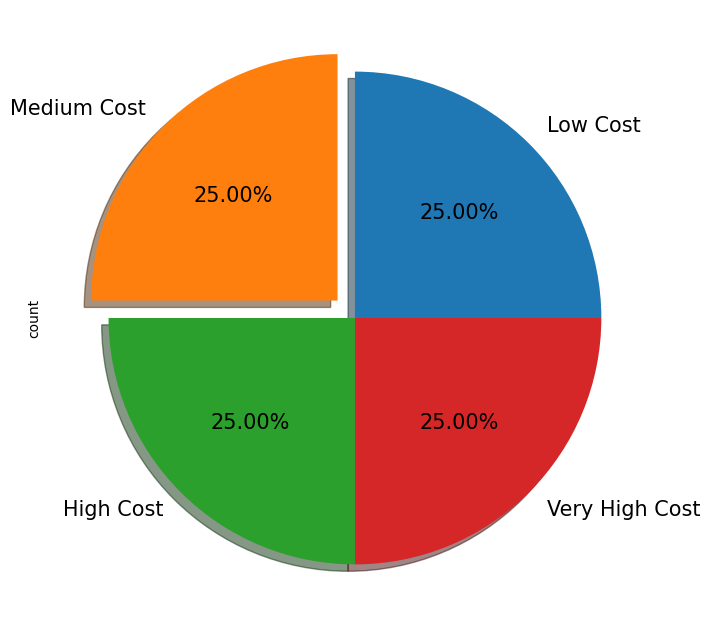

In [27]:
mobdf['price_range'].value_counts().plot.pie(explode=[0,0.1,0,0],shadow=True,autopct='%1.2f%%',labels = ['Low Cost','Medium Cost','High Cost','Very High Cost'],figsize=(10,8),fontsize=15)

Text(0.5, 1.0, 'Price Range Distribution for Batter Power')

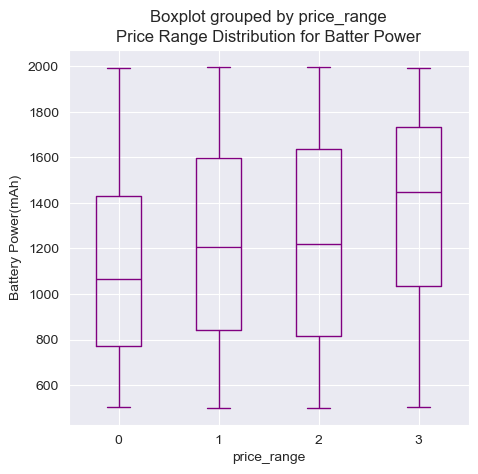

In [32]:
sns.set_style('darkgrid')
mobdf.boxplot(by='price_range',column = ['battery_power'],grid=True, figsize=(5,5),color='purple'),
plt.ylabel('Battery Power(mAh)')
plt.title('Price Range Distribution for Batter Power')

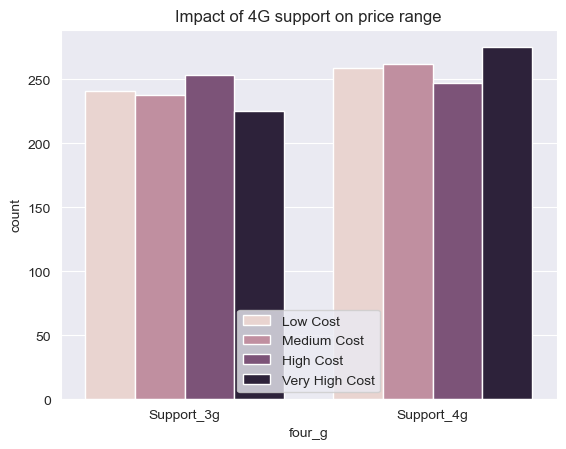

In [34]:
sns.countplot(x='four_g', hue='price_range', data=mobdf)
plt.title('Impact of 4G support on price range')
plt.xticks([0, 1], ['Support_3g', 'Support_4g'])
plt.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
plt.show()

Text(0.5, 1.0, 'Price Range Distribution for RAM')

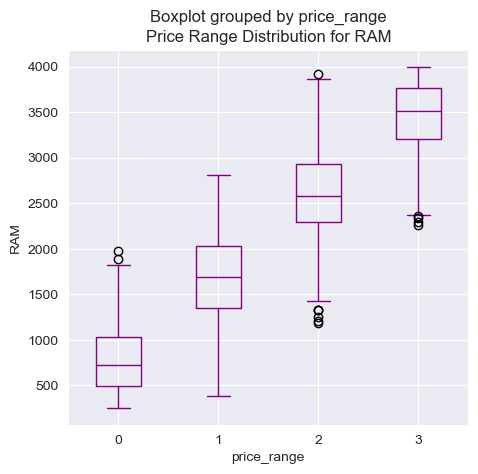

In [35]:
sns.set_style('darkgrid')
mobdf.boxplot(by='price_range',column = ['ram'],grid=True, figsize=(5,5),color='purple'),
plt.ylabel('RAM')
plt.title('Price Range Distribution for RAM')

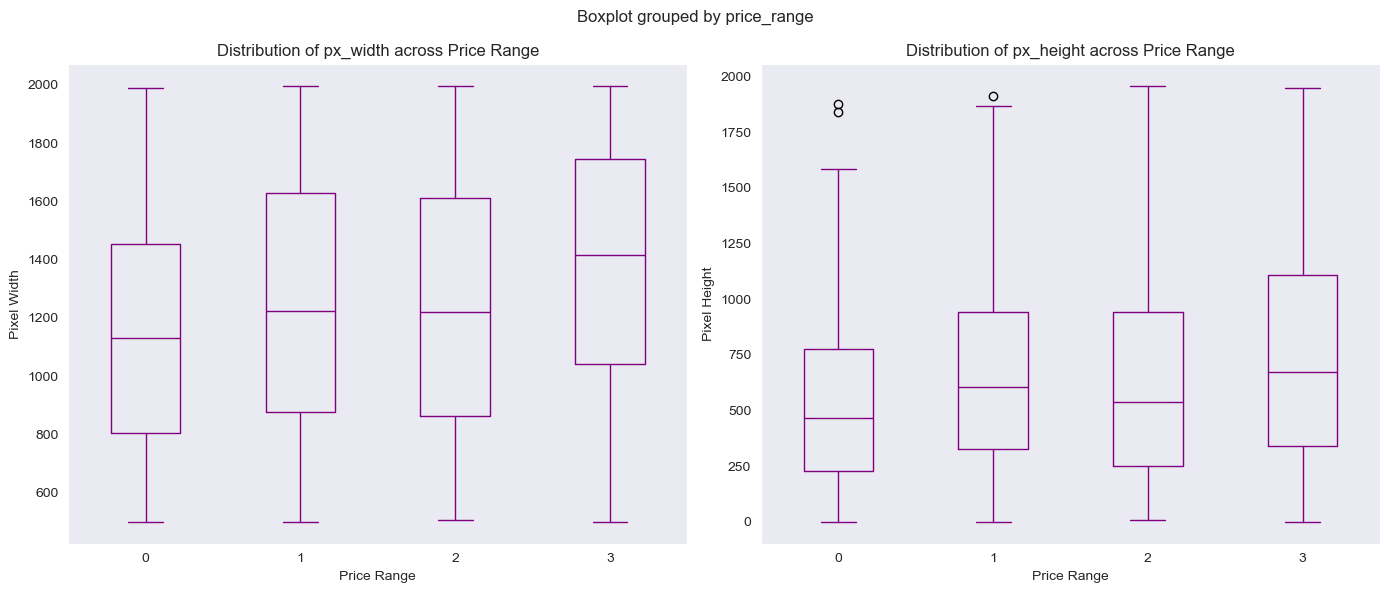

In [46]:

sns.set_style("darkgrid")
fig, axes = plt.subplots(ncols=2, figsize=(14, 6))

# Boxplot for px_width
mobdf.boxplot(by='price_range', column=['px_width'], grid=False, color='purple', ax=axes[0])
axes[0].set_xlabel('Price Range')
axes[0].set_ylabel('Pixel Width')
axes[0].set_title('Distribution of px_width across Price Range')

# Boxplot for px_height
mobdf.boxplot(by='price_range', column=['px_height'], grid=False, color='purple', ax=axes[1])
axes[1].set_xlabel('Price Range')
axes[1].set_ylabel('Pixel Height')
axes[1].set_title('Distribution of px_height across Price Range')


plt.tight_layout()
plt.show()


<Axes: xlabel='price_range', ylabel='fc'>

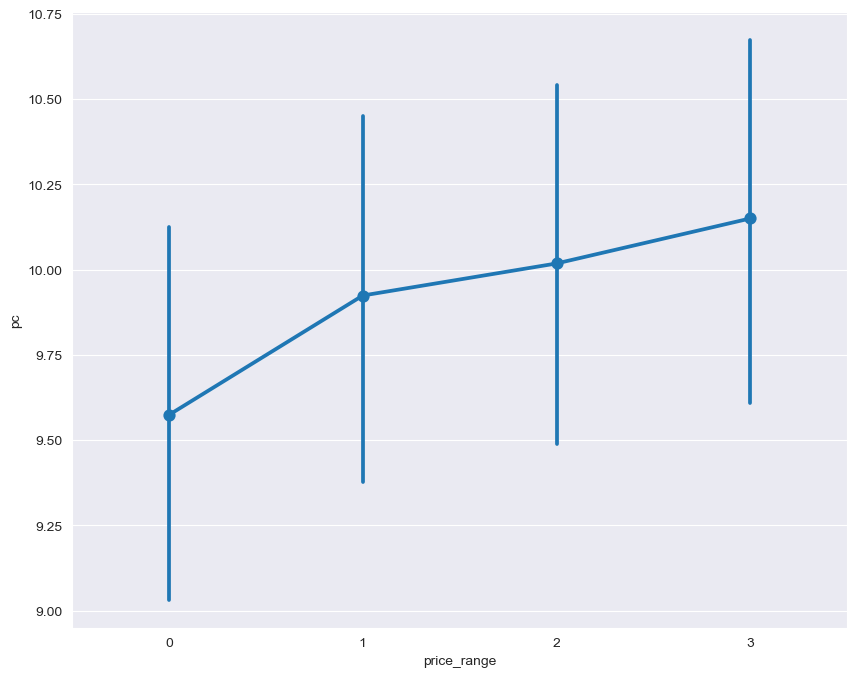

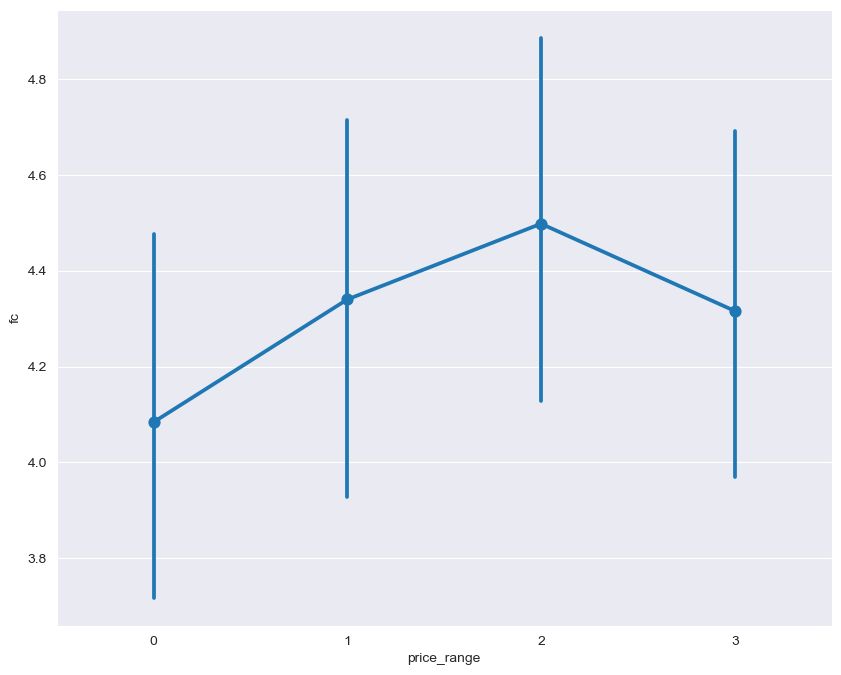

In [48]:
plt.figure(figsize=(10,8))
sns.pointplot(y='pc',x='price_range',data=mobdf)

plt.figure(figsize=(10,8))
sns.pointplot(y='fc',x='price_range',data=mobdf)

Text(0, 0.5, 'Screen Width')

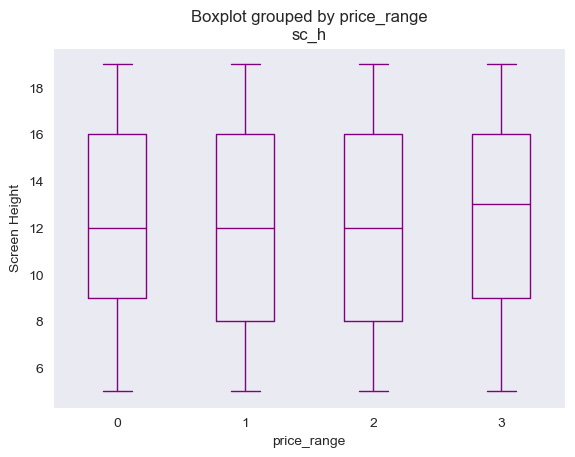

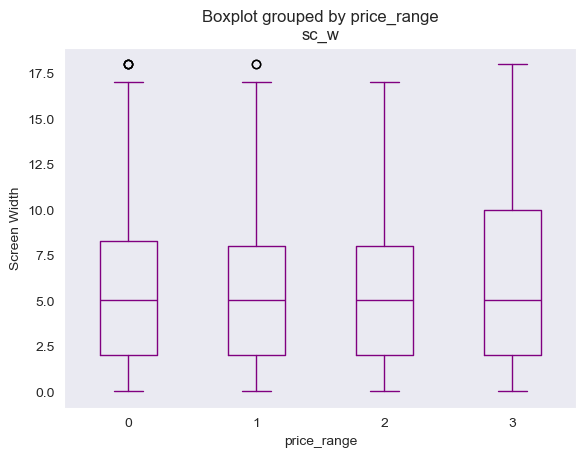

In [49]:
sns.set_style("darkgrid")
mobdf.boxplot(by ='price_range', column =['sc_h'], grid = False,color='purple'),
plt.ylabel("Screen Height")


#Screen Width
sns.set_style("darkgrid")
mobdf.boxplot(by ='price_range', column =['sc_w'], grid = False,color='purple'),
plt.ylabel("Screen Width")

<Axes: xlabel='price_range', ylabel='mobile_wt'>

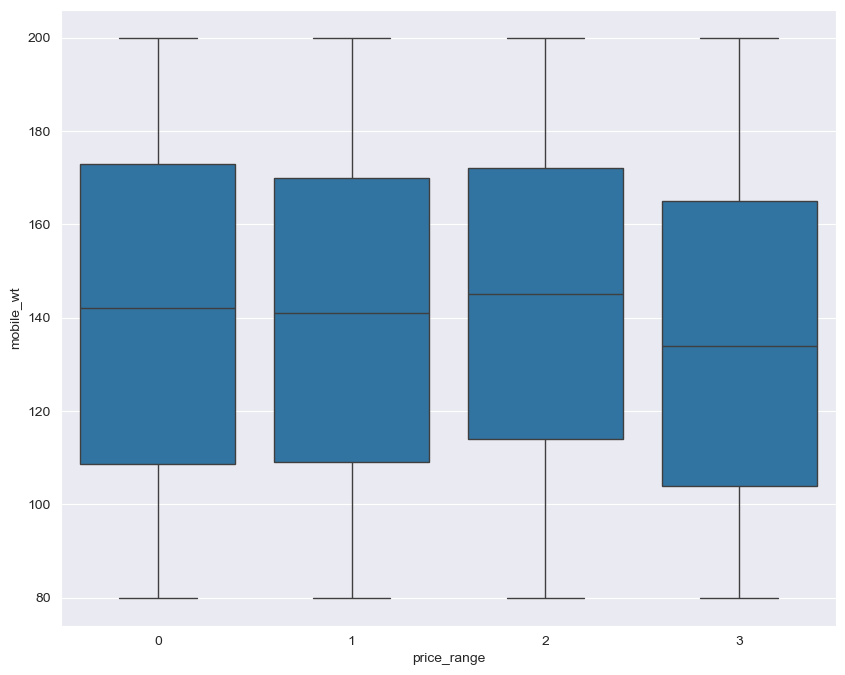

In [50]:
plt.figure(figsize=(10,8))
sns.boxplot(x=mobdf['price_range'],y=mobdf['mobile_wt'])

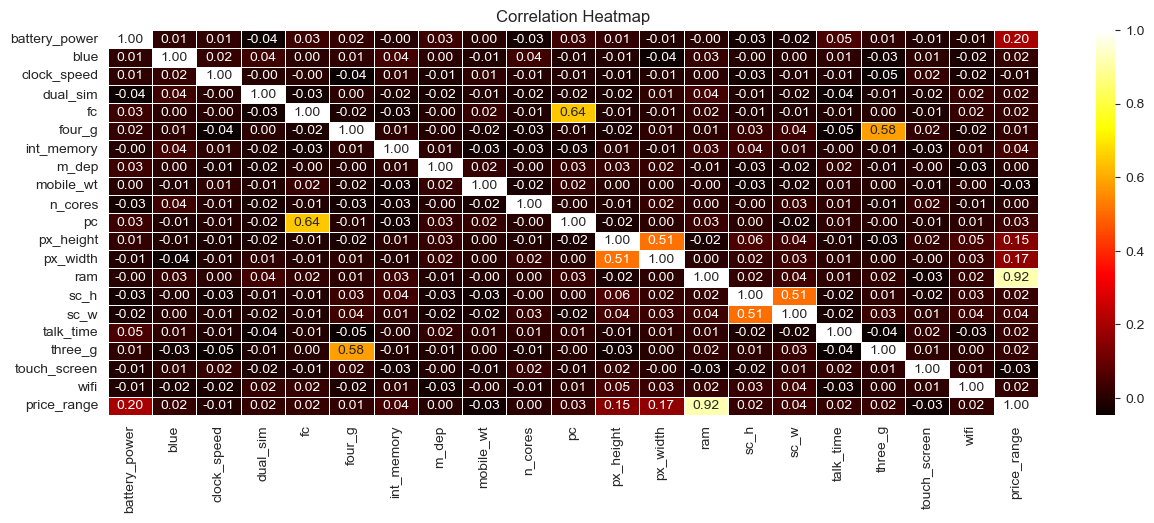

In [53]:
corr = mobdf.corr()
plt.figure(figsize=(15,5))

sns.heatmap(corr,annot=True,fmt='.2f',cmap='hot',linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [54]:
x=mobdf.drop(['price_range'],axis =1)
y=mobdf['price_range']

In [56]:
x.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [59]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [63]:
from sklearn.model_selection import train_test_split
xtrain, xtest,ytrain, ytest=train_test_split(x_scaled, y, test_size = 0.25, random_state = 100)
     

In [67]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
logr_model=LogisticRegression()
logr_model.fit(xtrain,ytrain)

y_pred_train=logr_model.predict(xtrain)
y_pred_test=logr_model.predict(xtest)

In [68]:
from sklearn.metrics import classification_report

print(classification_report(y_pred_test, ytest))

              precision    recall  f1-score   support

           0       0.99      0.92      0.96       145
           1       0.78      0.91      0.84       105
           2       0.86      0.84      0.85       121
           3       0.98      0.94      0.96       129

    accuracy                           0.91       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.91      0.91      0.91       500



In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_test, ytest)
print(cm)

[[134  11   0   0]
 [  1  96   8   0]
 [  0  16 102   3]
 [  0   0   8 121]]


Text(0.5, 1.0, 'Confusion Matrix')

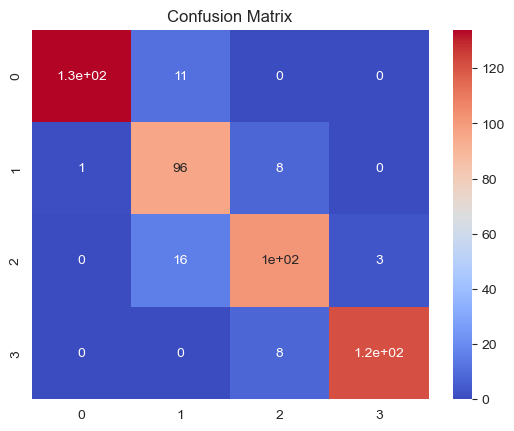

In [72]:
vis=sns.heatmap(cm,annot=True,  cmap='coolwarm')
vis.set_title('Confusion Matrix')

In [73]:
from sklearn.metrics import accuracy_score, classification_report

In [76]:
rfc=RandomForestClassifier(n_estimators=400)
rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=400)

In [77]:
y_pred2=rfc.predict(xtest)

In [78]:
test_score=accuracy_score(ytest,y_pred2)
test_score

0.89

In [79]:

print ('classification report for Random Forest (Test set) =')
print(classification_report(ytest,y_pred2))

classification report for Random Forest (Test set) =
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       135
           1       0.82      0.81      0.82       123
           2       0.85      0.83      0.84       118
           3       0.96      0.96      0.96       124

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500



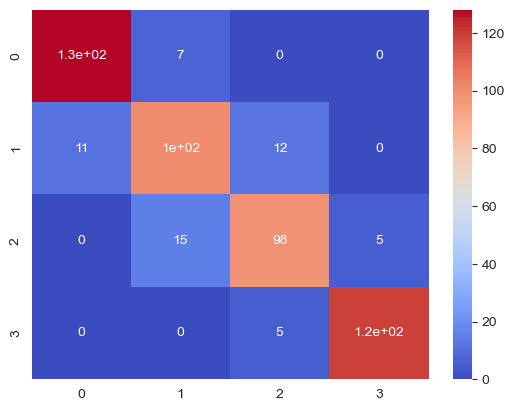

In [80]:
cf_matrix=confusion_matrix(ytest,y_pred2)
vis2=sns.heatmap(cf_matrix,annot=True, cmap='coolwarm')

In [102]:
feature_imp=pd.DataFrame({'Feature':x.columns,'score':rfc.feature_importances_}).sort_values(by='score',ascending=False).reset_index(drop=True)
feature_imp

,Feature,score
0,ram,0.472885
1,battery_power,0.074078
2,px_height,0.058646
3,px_width,0.055233
4,mobile_wt,0.040382
5,int_memory,0.037255
6,talk_time,0.030878
7,pc,0.029740
8,sc_w,0.028491
9,clock_speed,0.028417


<Axes: xlabel='score', ylabel='Feature'>

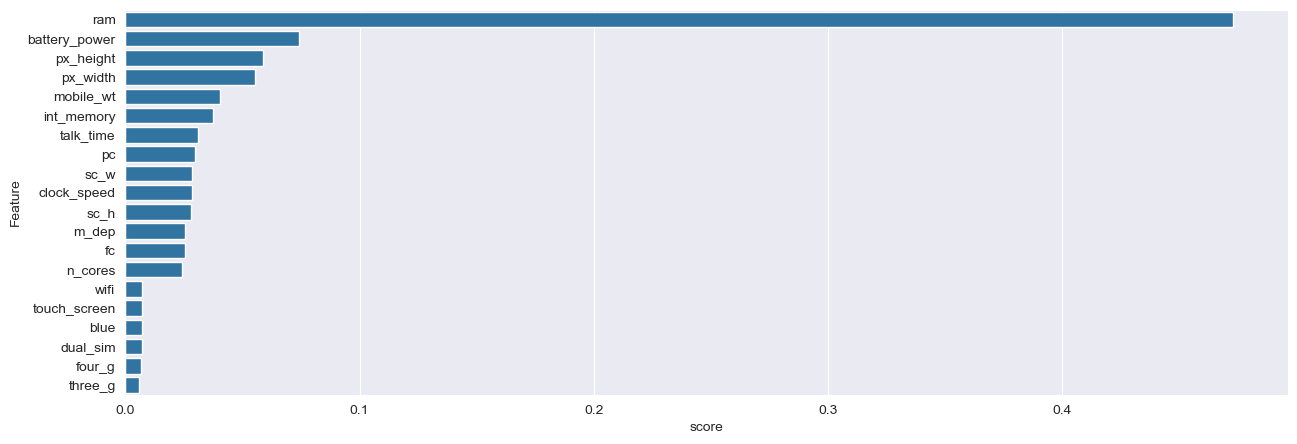

In [83]:
plt.figure(figsize=(15,5))
sns.barplot(x=feature_imp['score'],y=feature_imp['Feature'])

In [89]:
from sklearn.model_selection import GridSearchCV
htrf = {'n_estimators':[10,50,100,200],
        'max_depth':[10,20,30,40],
        'min_samples_split':[2,4,6],
        'max_features':['sqrt','log2',4,'auto'],
        'max_leaf_nodes':[10,20,40]}

rf=RandomForestClassifier()
clsr=GridSearchCV(rf,htrf,scoring='accuracy',cv=3)

In [90]:
clsr.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['sqrt', 'log2', 4, 'auto'],
                         'max_leaf_nodes': [10, 20, 40],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [91]:
clsr.best_params_

{'max_depth': 10,
 'max_features': 'log2',
 'max_leaf_nodes': 40,
 'min_samples_split': 6,
 'n_estimators': 200}

In [93]:
clsr.best_score_

0.856

In [94]:
clsr.best_estimator_

RandomForestClassifier(max_depth=10, max_features='log2', max_leaf_nodes=40,
                       min_samples_split=6, n_estimators=200)

In [95]:
y_pred_rf=clsr.predict(xtest)
accuracy_score(ytest,y_pred_rf)

0.862

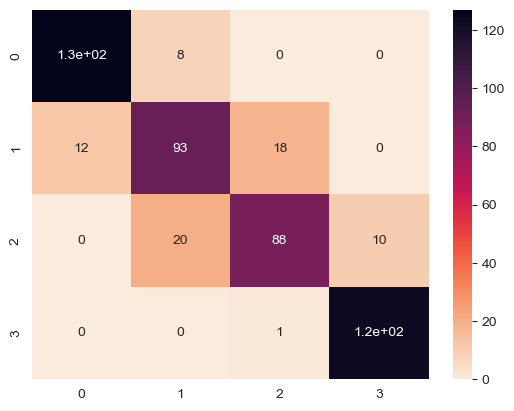

In [98]:
cf_matrix=confusion_matrix(ytest,y_pred_rf)
vis=sns.heatmap(cf_matrix,annot=True,cmap='rocket_r')

In [105]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(max_depth=5)
dtc.fit(xtrain,ytrain)

# Fit and predict the Algorithm
y_pred3_test=dtc.predict(xtest)

     

score =accuracy_score(ytest,y_pred3_test)
score

0.812

In [106]:


print("classifcation report for decision tree classifier")
print(classification_report(y_pred3_test,ytest))

classifcation report for decision tree classifier
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       139
           1       0.72      0.75      0.74       119
           2       0.74      0.69      0.71       126
           3       0.85      0.91      0.88       116

    accuracy                           0.81       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.81      0.81      0.81       500



In [107]:
from sklearn.model_selection import GridSearchCV
DTgrid = GridSearchCV(dtc, param_grid = {'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)}, scoring = 'accuracy', cv = 5, verbose = 24)
DTgrid.fit(xtrain,ytrain)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 1/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.780 total time=   0.0s
[CV 2/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 2/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.780 total time=   0.0s
[CV 3/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 3/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.800 total time=   0.0s
[CV 4/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 4/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.817 total time=   0.0s
[CV 5/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 5/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.777 total time=   0.0s
[CV 1/5; 2/4] START max_depth=5, max_leaf_nodes=100.............................
[CV 1/5; 2/4] END max_depth=5, max_leaf_node

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)},
             scoring='accuracy', verbose=24)

In [109]:

y_pred3test=DTgrid.predict(xtest)

In [111]:

print('Classification Report for Decision Tree (test set)= ')
print(classification_report(ytest, y_pred3_test))

Classification Report for Decision Tree (test set)= 
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       135
           1       0.75      0.72      0.74       123
           2       0.69      0.74      0.71       118
           3       0.91      0.85      0.88       124

    accuracy                           0.81       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.81      0.81      0.81       500



In [112]:

cf_matrix=confusion_matrix(ytest,y_pred3_test)

In [113]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [114]:
svm=make_pipeline(StandardScaler(),SVC(gamma='auto'))
svm.fit(xtrain,ytrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [115]:
y_pred4_test=svm.predict(xtest)


In [116]:
print('Classification report for Support Vector Machine (Test set)= ')
print(classification_report(y_pred4_test, ytest))

Classification report for Support Vector Machine (Test set)= 
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       133
           1       0.78      0.81      0.79       119
           2       0.85      0.78      0.81       128
           3       0.91      0.94      0.93       120

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500



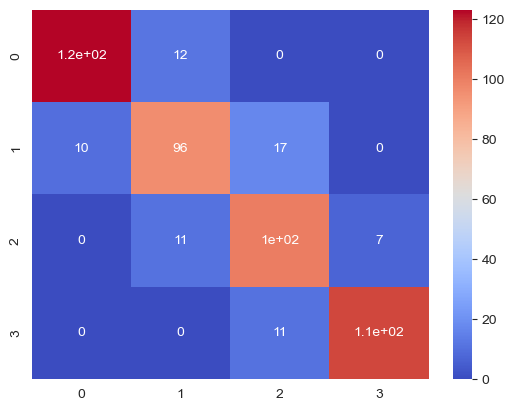

In [117]:
CF_matrix = confusion_matrix(ytest, y_pred4_test)
vis=sns.heatmap(CF_matrix,annot=True, cmap='coolwarm')